In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

ImportError: cannot import name 'cramers_v' from 'scipy.stats' (c:\Users\dalre\anaconda3\Lib\site-packages\scipy\stats\__init__.py)

In [52]:
pd.set_option('display.max_columns', None)

In [53]:
# Loading the Melbourne Housing Market CSV file
melbourne_housing_market_df = pd.read_csv("https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv")
melbourne_housing_market_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [54]:
# Display initial information to understand the data structure
melbourne_housing_market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [55]:
# Check the initial number of null values
rows_before_drop_null_values = melbourne_housing_market_df.shape[0]
rows_before_drop_null_values

34857

In [56]:
# Drop the null values in the 'Price' column
melbourne_housing_market_df = melbourne_housing_market_df.dropna(subset=['Price'])

In [57]:
# Check the final number of rows after dropping the null values
rows_after_drop_null_values = melbourne_housing_market_df.shape[0]
rows_after_drop_null_values

27247

In [58]:
# Calculating the difference 
rows_after_drop_null_values / rows_before_drop_null_values 

0.7816794331124308

In [59]:
# Cast the 'Price' column to an integer
melbourne_housing_market_df['Price'] = melbourne_housing_market_df['Price'].astype(int)
melbourne_housing_market_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27247 entries, 1 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27247 non-null  object 
 1   Address        27247 non-null  object 
 2   Rooms          27247 non-null  int64  
 3   Type           27247 non-null  object 
 4   Price          27247 non-null  int32  
 5   Method         27247 non-null  object 
 6   SellerG        27247 non-null  object 
 7   Date           27247 non-null  object 
 8   Distance       27246 non-null  float64
 9   Postcode       27246 non-null  float64
 10  Bedroom2       20806 non-null  float64
 11  Bathroom       20800 non-null  float64
 12  Car            20423 non-null  float64
 13  Landsize       17982 non-null  float64
 14  BuildingArea   10656 non-null  float64
 15  YearBuilt      12084 non-null  float64
 16  CouncilArea    27244 non-null  object 
 17  Lattitude      20993 non-null  float64
 18  Longtitude 

C:\Users\dalre\AppData\Local\Temp\ipykernel_29892\1968019592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melbourne_housing_market_df['Price'] = melbourne_housing_market_df['Price'].astype(int)


In [60]:
# Count the occurrences of each property type
type_counts = melbourne_housing_market_df['Type'].value_counts()

# Calculate the total number of properties
total_properties = len(melbourne_housing_market_df)

# Find the most common type
most_common_type = type_counts.index[0]
most_common_count = type_counts[most_common_type]

# Calculate the percentage
percentage = (most_common_count / total_properties) * 100

# Print the results
print(f"The most common type of property is '{most_common_type}'.")
print(f"It represents {percentage:.2f}% of all properties.")

The most common type of property is 'h'.
It represents 67.79% of all properties.


# Graphs to show the frequency of each property type in descending order

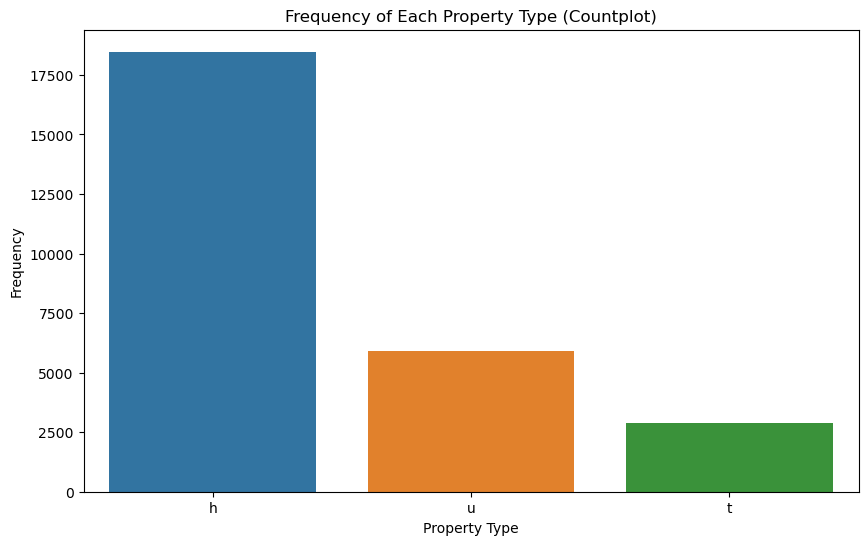

In [76]:
# Plot the frequency of each property type using a countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=melbourne_housing_market_df, order=melbourne_housing_market_df['Type'].value_counts().index)
plt.xlabel('Property Type')
plt.ylabel('Frequency')
plt.title('Frequency of Each Property Type (Countplot)')
plt.show()

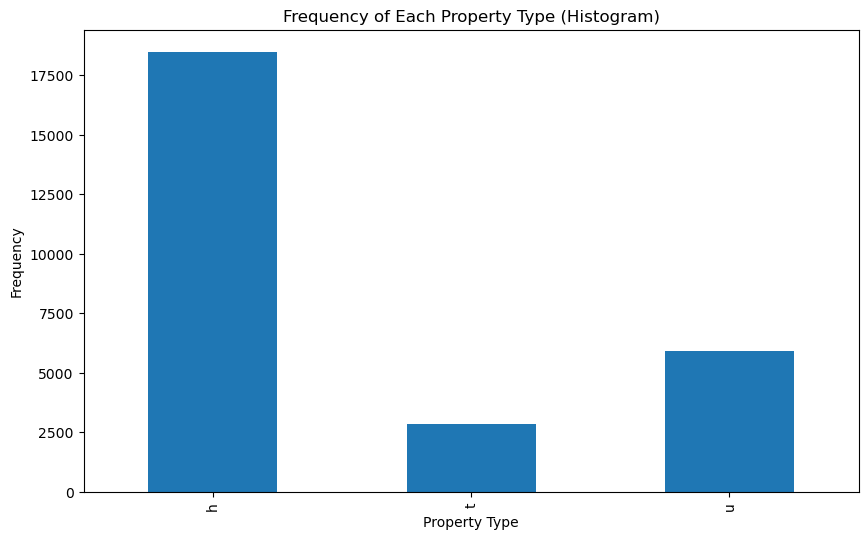

In [79]:
# Plot the frequency of each property type using a histogram
plt.figure(figsize=(10, 6))
melbourne_housing_market_df['Type'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Property Type')
plt.ylabel('Frequency')
plt.title('Frequency of Each Property Type (Histogram)')
plt.show()
plt.show()

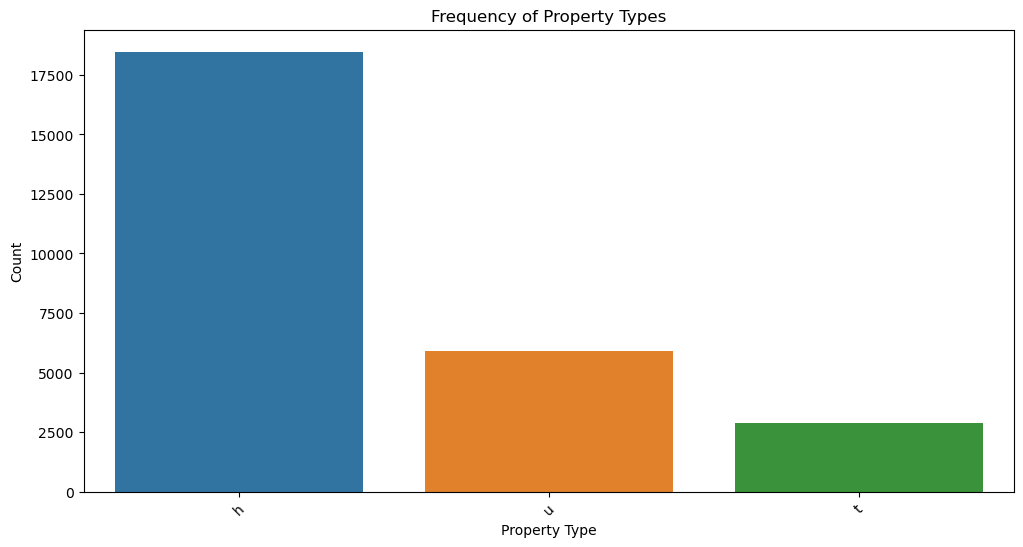

In [61]:
plt.figure(figsize=(12, 6))
sns.countplot(data=melbourne_housing_market_df, x='Type', order=melbourne_housing_market_df['Type'].value_counts().index)
plt.title('Frequency of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

4

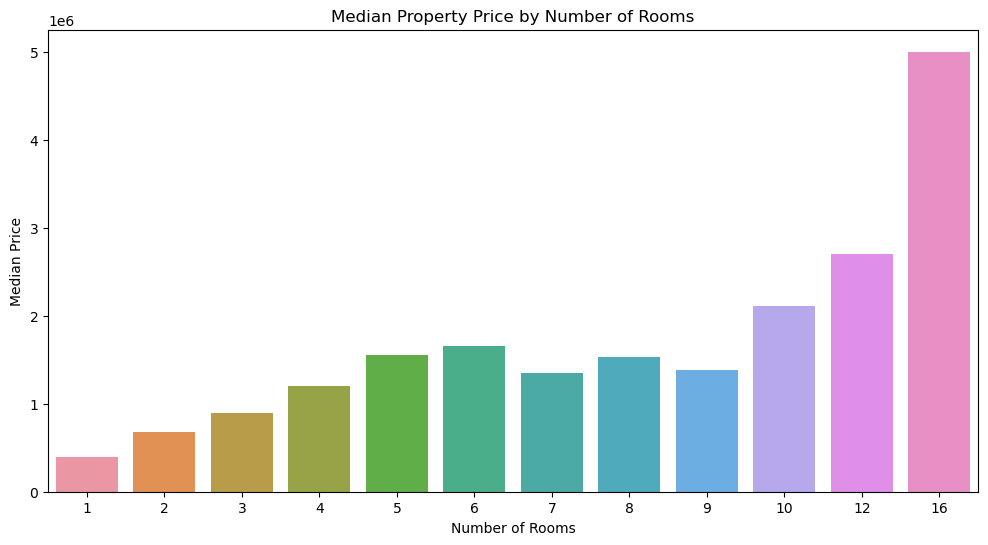

In [62]:
room_price = melbourne_housing_market_df.groupby('Rooms')['Price'].median().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=room_price, x='Rooms', y='Price')
plt.title('Median Property Price by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Median Price')
plt.show()

5

In [80]:
corr, p_value = stats.spearmanr(melbourne_housing_market_df['Rooms'], melbourne_housing_market_df['Price'])
print(f"Spearman correlation coefficient: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

Spearman correlation coefficient: 0.5043
P-value: 0.0000


6

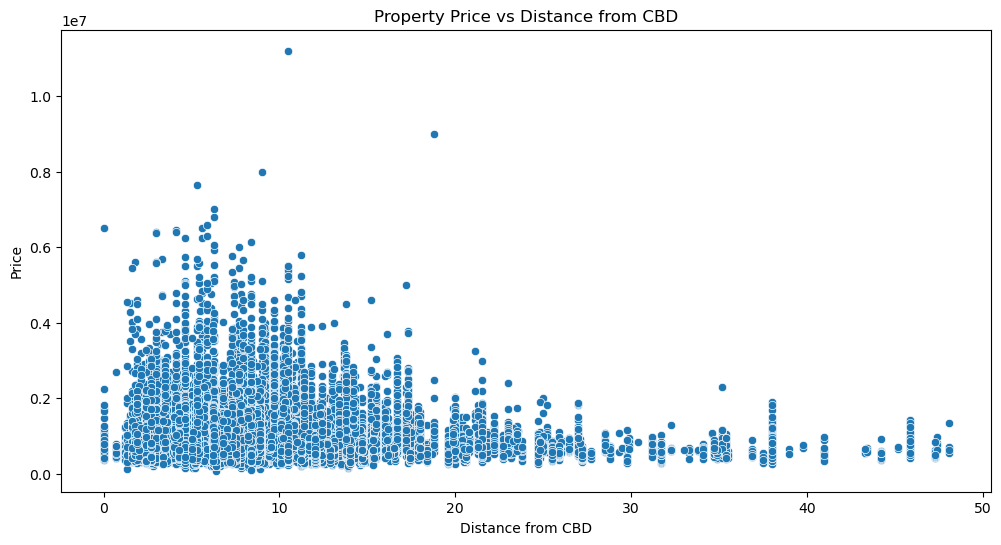

In [84]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=melbourne_housing_market_df, x='Distance', y='Price')
plt.title('Property Price vs Distance from CBD')
plt.xlabel('Distance from CBD')
plt.ylabel('Price')
plt.show()


In [85]:
# Remove rows with NaN values in 'Distance' or 'Price'
df_clean = melbourne_housing_market_df.dropna(subset=['Distance', 'Price'])

corr, p_value = stats.pearsonr(df_clean['Distance'], df_clean['Price'])
print(f"Pearson correlation coefficient: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

Pearson correlation coefficient: -0.2114
P-value: 0.0000


7

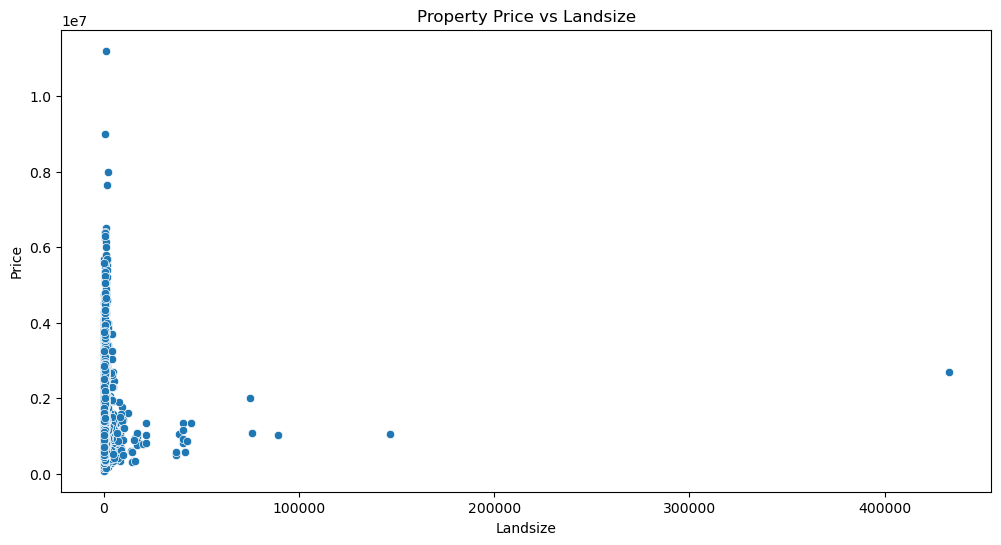

In [82]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=melbourne_housing_market_df, x='Landsize', y='Price')
plt.title('Property Price vs Landsize')
plt.xlabel('Landsize')
plt.ylabel('Price')
plt.show()


In [83]:
# Remove rows with NaN values in 'Landsize' or 'Price'
df_clean = melbourne_housing_market_df.dropna(subset=['Landsize', 'Price'])

corr, p_value = stats.pearsonr(df_clean['Landsize'], df_clean['Price'])
print(f"Pearson correlation coefficient: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

Pearson correlation coefficient: 0.0327
P-value: 0.0000


8

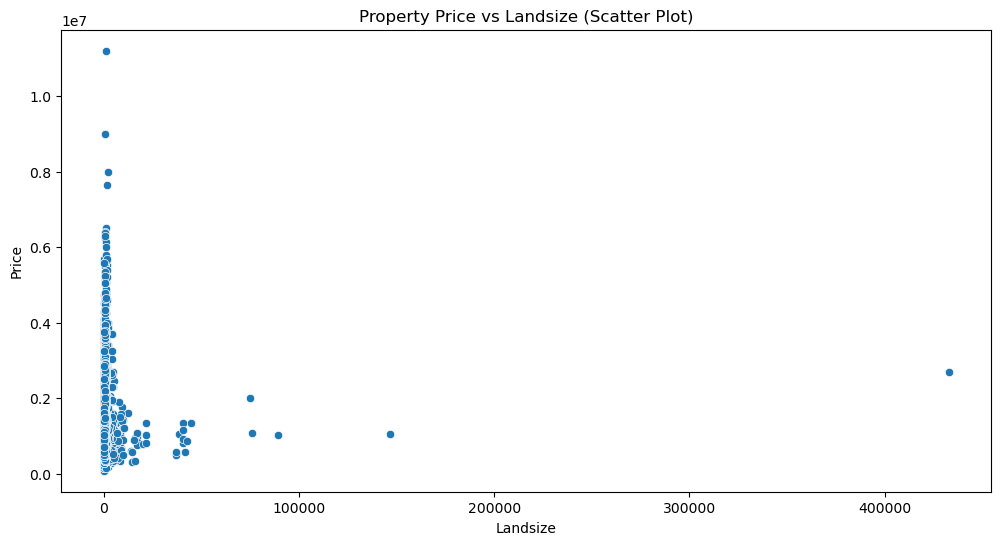

C:\Users\dalre\AppData\Local\Temp\ipykernel_29892\3133466517.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melbourne_housing_market_df['Landsize_cat'] = pd.qcut(melbourne_housing_market_df['Landsize'], q=7, labels=['Very Small', 'Small', 'Medium-Small', 'Medium', 'Medium-Large', 'Large', 'Very Large'])
c:\Users\dalre\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


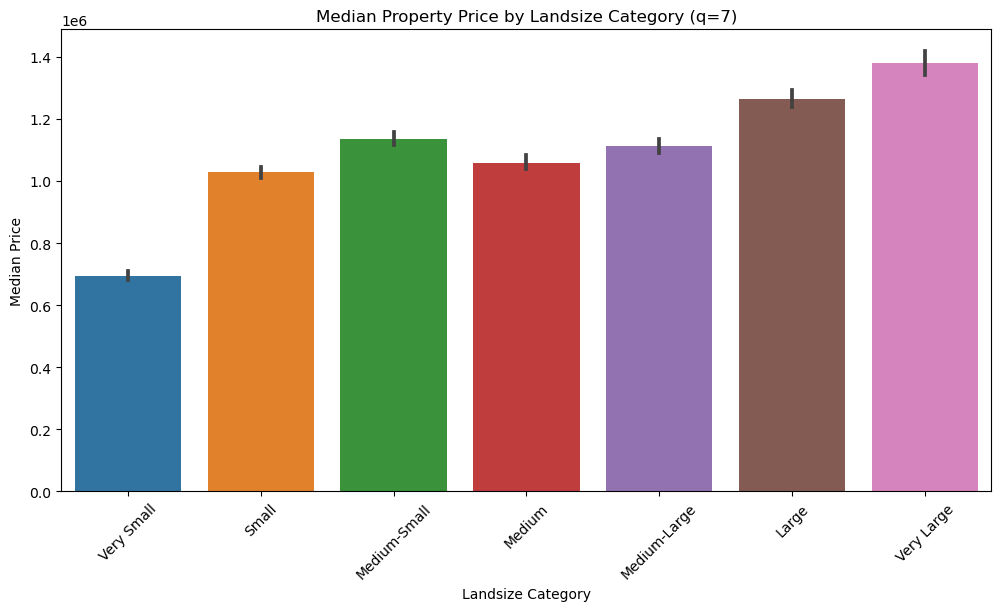

C:\Users\dalre\AppData\Local\Temp\ipykernel_29892\3133466517.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melbourne_housing_market_df['Landsize_cat_low'] = pd.qcut(melbourne_housing_market_df['Landsize'], q=4, labels=['Small', 'Medium-Small', 'Medium-Large', 'Large'])
c:\Users\dalre\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


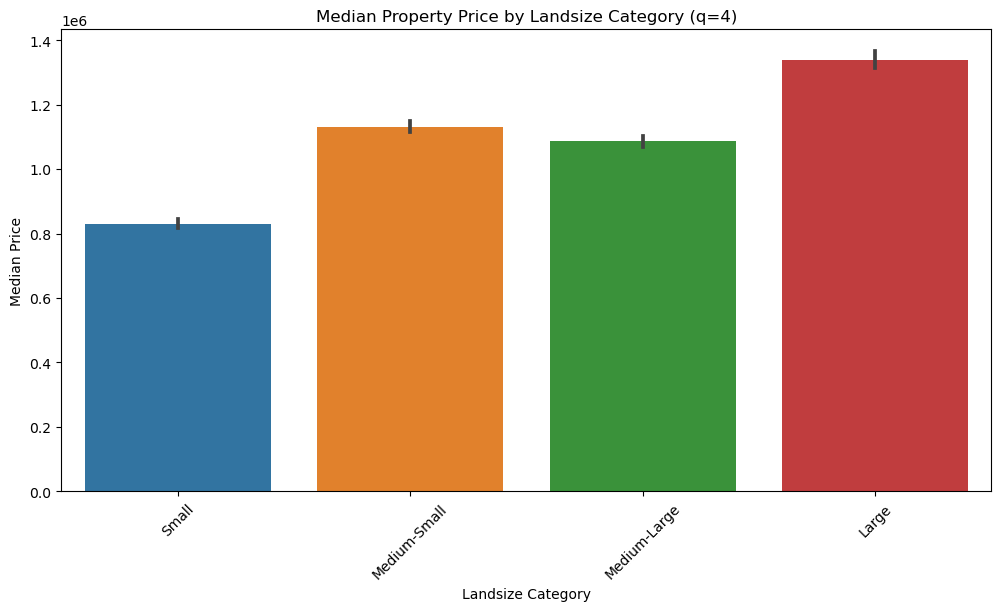

In [88]:
# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=melbourne_housing_market_df, x='Landsize', y='Price')
plt.title('Property Price vs Landsize (Scatter Plot)')
plt.xlabel('Landsize')
plt.ylabel('Price')
plt.show()

# Barplot with quantile-based discretization (q=7)
melbourne_housing_market_df['Landsize_cat'] = pd.qcut(melbourne_housing_market_df['Landsize'], q=7, labels=['Very Small', 'Small', 'Medium-Small', 'Medium', 'Medium-Large', 'Large', 'Very Large'])

plt.figure(figsize=(12, 6))
sns.barplot(data=melbourne_housing_market_df, x='Landsize_cat', y='Price')
plt.title('Median Property Price by Landsize Category (q=7)')
plt.xlabel('Landsize Category')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.show()

# Comparison with lower quantile value (q=4)
melbourne_housing_market_df['Landsize_cat_low'] = pd.qcut(melbourne_housing_market_df['Landsize'], q=4, labels=['Small', 'Medium-Small', 'Medium-Large', 'Large'])

plt.figure(figsize=(12, 6))
sns.barplot(data=melbourne_housing_market_df, x='Landsize_cat_low', y='Price')
plt.title('Median Property Price by Landsize Category (q=4)')
plt.xlabel('Landsize Category')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.show()

9

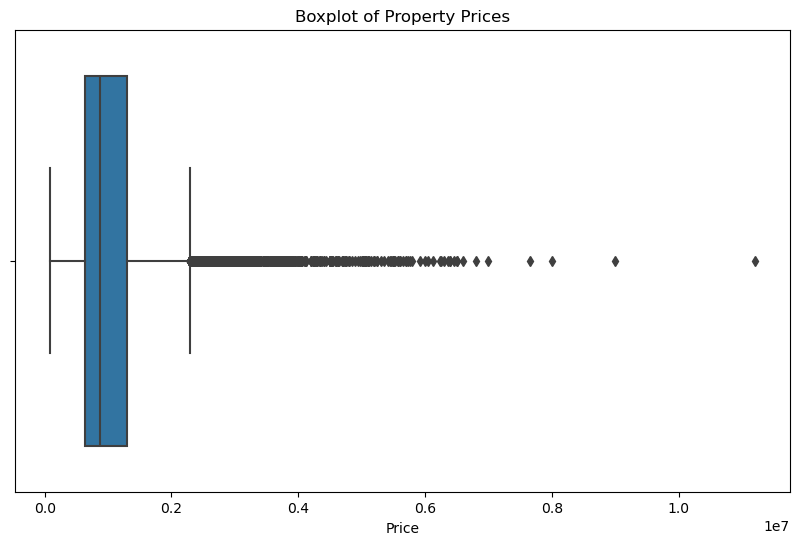

Percentage of properties identified as outliers: 4.69%


In [ ]:
import numpy as np

plt.figure(figsize=(10, 6))
sns.boxplot(x=melbourne_housing_market_df['Price'])
plt.title('Boxplot of Property Prices')
plt.show()

Q1 = melbourne_housing_market_df['Price'].quantile(0.25)
Q3 = melbourne_housing_market_df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = melbourne_housing_market_df[(melbourne_housing_market_df['Price'] >= lower_bound) & 
                                             (melbourne_housing_market_df['Price'] <= upper_bound)]

outlier_percentage = (1 - len(df_no_outliers) / len(melbourne_housing_market_df)) * 100
print(f"Percentage of properties identified as outliers: {outlier_percentage:.2f}%")

10

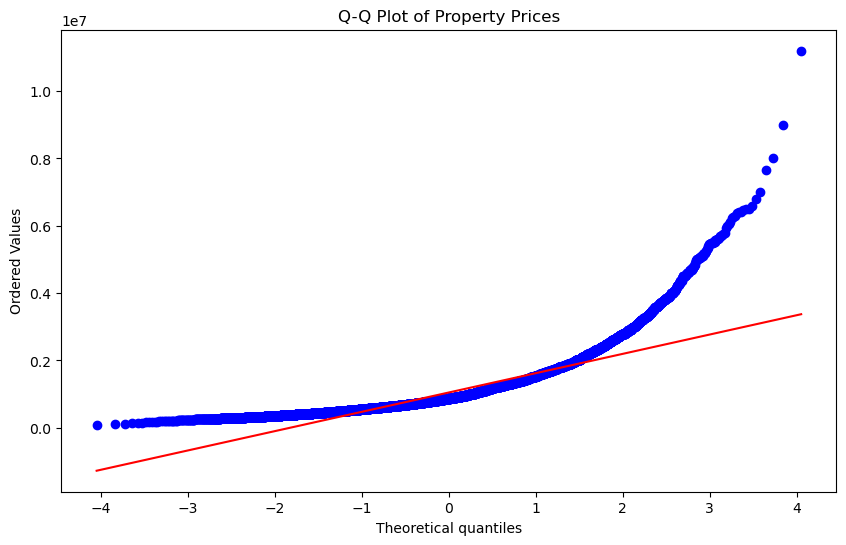

Skewness: 2.5890
Kurtosis: 13.0972


In [65]:
from scipy import stats

plt.figure(figsize=(10, 6))
stats.probplot(melbourne_housing_market_df['Price'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Property Prices")
plt.show()

skewness = melbourne_housing_market_df['Price'].skew()
kurtosis = melbourne_housing_market_df['Price'].kurtosis()

print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

11

In [66]:
from scipy import stats

ks_statistic, p_value = stats.kstest(melbourne_housing_market_df['Price'], 'norm')

print(f"Kolmogorov-Smirnov test statistic: {ks_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("The distribution is significantly different from a normal distribution.")
else:
    print("The distribution is not significantly different from a normal distribution.")

Kolmogorov-Smirnov test statistic: 1.0000
p-value: 0.0000
The distribution is significantly different from a normal distribution.


12

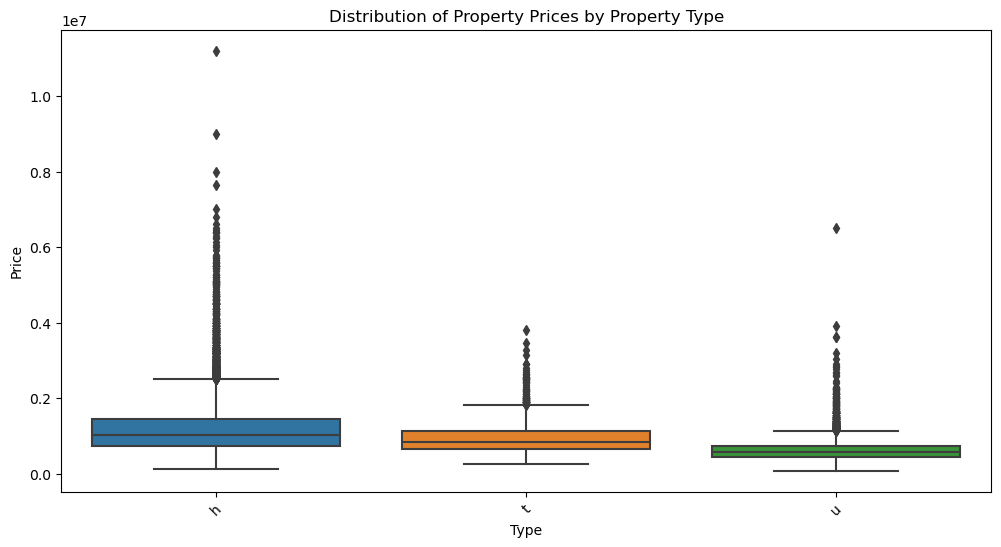

In [67]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Price', data=melbourne_housing_market_df)
plt.title('Distribution of Property Prices by Property Type')
plt.xticks(rotation=45)
plt.show()

13

In [68]:
region_prices = melbourne_housing_market_df.groupby('Regionname')['Price'].median().sort_values(ascending=False)
print(f"Region with highest median price: {region_prices.index[0]} (${region_prices.iloc[0]:,.2f})")
print(f"Region with lowest median price: {region_prices.index[-1]} (${region_prices.iloc[-1]:,.2f})")

Region with highest median price: Southern Metropolitan ($1,250,000.00)
Region with lowest median price: Western Victoria ($412,125.00)


14

In [69]:
from scipy.stats import chi2_contingency
from scipy.stats import cramers_v

# Divide price into 5 categories
melbourne_housing_market_df['PriceCategory'] = pd.qcut(melbourne_housing_market_df['Price'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Create contingency table
contingency_table = pd.crosstab(melbourne_housing_market_df['Regionname'], melbourne_housing_market_df['PriceCategory'])

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")

# Calculate Cramer's V
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramer_v = np.sqrt(chi2 / (n * min_dim))

print(f"Cramer's V: {cramer_v:.4f}")

if p_value < 0.05:
    print("There is a statistically significant association between region and price.")
else:
    print("There is no statistically significant association between region and price.")

ImportError: cannot import name 'cramers_v' from 'scipy.stats' (c:\Users\dalre\anaconda3\Lib\site-packages\scipy\stats\__init__.py)

15

In [89]:
# Convert 'Date' to datetime and extract year
melbourne_housing_market_df['Date'] = pd.to_datetime(melbourne_housing_market_df['Date'], errors='coerce')
melbourne_housing_market_df['Year'] = melbourne_housing_market_df['Date'].dt.year

# Remove rows with NaN values in 'Year' or 'Price'
df_clean = melbourne_housing_market_df.dropna(subset=['Year', 'Price'])

yearly_median_prices = df_clean.groupby('Year')['Price'].median()

earliest_year = yearly_median_prices.index.min()
latest_year = yearly_median_prices.index.max()

earliest_price = yearly_median_prices[earliest_year]
latest_price = yearly_median_prices[latest_year]

percentage_change = ((latest_price - earliest_price) / earliest_price) * 100

print(f"Percentage change in median price from {earliest_year} to {latest_year}: {percentage_change:.2f}%")

Percentage change in median price from 2016.0 to 2018.0: -11.11%


C:\Users\dalre\AppData\Local\Temp\ipykernel_29892\2292669019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melbourne_housing_market_df['Date'] = pd.to_datetime(melbourne_housing_market_df['Date'], errors='coerce')
C:\Users\dalre\AppData\Local\Temp\ipykernel_29892\2292669019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melbourne_housing_market_df['Year'] = melbourne_housing_market_df['Date'].dt.year


16

C:\Users\dalre\AppData\Local\Temp\ipykernel_29892\2413539234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melbourne_housing_market_df['Date'] = pd.to_datetime(melbourne_housing_market_df['Date'], errors='coerce')
C:\Users\dalre\AppData\Local\Temp\ipykernel_29892\2413539234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melbourne_housing_market_df['Month'] = melbourne_housing_market_df['Date'].dt.month


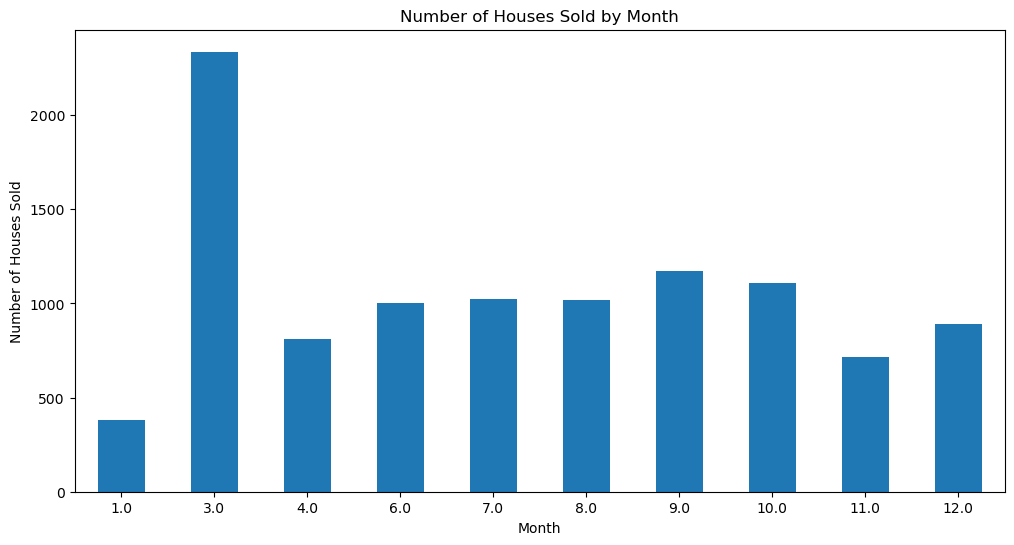

The month with the most houses sold is: 3.0


In [90]:
# Convert 'Date' to datetime and extract month
melbourne_housing_market_df['Date'] = pd.to_datetime(melbourne_housing_market_df['Date'], errors='coerce')
melbourne_housing_market_df['Month'] = melbourne_housing_market_df['Date'].dt.month

# Remove rows with NaN values in 'Month'
df_clean = melbourne_housing_market_df.dropna(subset=['Month'])

monthly_sales = df_clean['Month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar')
plt.title('Number of Houses Sold by Month')
plt.xlabel('Month')
plt.ylabel('Number of Houses Sold')
plt.xticks(rotation=0)
plt.show()

most_active_month = monthly_sales.idxmax()
print(f"The month with the most houses sold is: {most_active_month}")